In [2]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"

# Preprocessing Data

In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# check which features have missing values
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# filling in missing data

data['HomePlanet'] = data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Destination']=data['Destination'].fillna(data['Destination'].mode()[0])
data['VIP']=data['VIP'].fillna(data['VIP'].mode()[0])

data['Age']=data['Age'].fillna(data['Age'].median())
data['RoomService'] = data['RoomService'].fillna(data['RoomService'].median())
data['FoodCourt'] = data['FoodCourt'].fillna(data['FoodCourt'].median())
data['ShoppingMall'] = data['ShoppingMall'].fillna(data['ShoppingMall'].median())
data['Spa'] = data['Spa'].fillna(data['Spa'].median())
data['VRDeck'] = data['VRDeck'].fillna(data['VRDeck'].median())

In [6]:
data.drop(columns=['Name','PassengerId'], inplace=True)

In [7]:
# convert categorical to numerical
one_hot = LabelEncoder()
data['CryoSleep'] = one_hot.fit_transform(data['CryoSleep'])
data['VIP'] = one_hot.fit_transform(data['VIP'])
data['HomePlanet'] = one_hot.fit_transform(data['HomePlanet'])
data['Destination'] = one_hot.fit_transform(data['Destination'])
data['Cabin'] = one_hot.fit_transform(data['Cabin'])
data['Transported'] = one_hot.fit_transform(data['Transported'])

In [114]:
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [8]:
# normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Transported', axis=1))
data_scaled = pd.concat([pd.DataFrame(data_scaled),data['Transported'].reset_index(drop=True)], axis=1)
data_scaled.columns=data.columns
data_scaled

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.440385,-0.732770,-1.531918,0.620545,0.711945,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0
1,-0.817259,-0.732770,-0.516332,0.620545,-0.334037,-0.153063,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1
2,0.440385,-0.732770,-1.605779,0.620545,2.036857,6.533255,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0
3,0.440385,-0.732770,-1.605779,0.620545,0.293552,-0.153063,-0.333105,0.523010,0.336851,2.687176,-0.092818,0
4,-0.817259,-0.732770,-0.515334,0.620545,-0.891895,-0.153063,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.440385,-0.732770,-1.533415,-1.833685,0.851410,6.533255,-0.333105,3.992336,-0.283579,1.189173,-0.197751,0
8689,-0.817259,1.364685,1.028757,-0.606570,-0.752431,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0
8690,-0.817259,-0.732770,1.031252,0.620545,-0.194573,-0.153063,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1
8691,0.440385,-0.732770,-0.542782,-1.833685,0.223820,-0.153063,-0.333105,0.376365,-0.283579,0.043013,2.589576,0


In [9]:
train, valid = train_test_split(data_scaled, test_size = 0.05, random_state=1)
X_train = train.drop('Transported',axis=1)
Y_train = train['Transported']
X_valid = valid.drop('Transported',axis=1)
Y_valid = valid['Transported']

In [10]:
X_train.shape

(8258, 11)

# Training a Model

In [89]:
# model architecture
model = tf.keras.Sequential([
    tfl.Dense(units=256, activation='relu', input_shape=(11,)),
    tfl.Dropout(0.5),
    tfl.Dense(units=128, activation='relu'),
    tfl.Dense(units=64, activation='relu'),
    tfl.Dense(units=32, activation='relu'),
    tfl.Dense(units=16, activation='relu'),
    tfl.Dense(units=8, activation='relu'),
    tfl.Dense(units=4, activation='relu'),
    tfl.Dense(units=1, activation='sigmoid')
])

In [90]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

epochs = 100
batch_size = 128

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               3072      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                

In [92]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, Y_valid))

Epoch 1/100
65/65 [==============================] - 1s 9ms/step - loss: 0.6338 - accuracy: 0.7025 - val_loss: 0.5695 - val_accuracy: 0.7816
Epoch 2/100
65/65 [==============================] - 0s 6ms/step - loss: 0.5650 - accuracy: 0.7825 - val_loss: 0.5534 - val_accuracy: 0.7770
Epoch 3/100
65/65 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.7857 - val_loss: 0.5519 - val_accuracy: 0.7747
Epoch 4/100
65/65 [==============================] - 0s 5ms/step - loss: 0.5457 - accuracy: 0.7880 - val_loss: 0.5384 - val_accuracy: 0.7793
Epoch 5/100
65/65 [==============================] - 0s 5ms/step - loss: 0.5366 - accuracy: 0.7909 - val_loss: 0.5348 - val_accuracy: 0.7655
Epoch 6/100
65/65 [==============================] - 0s 7ms/step - loss: 0.5298 - accuracy: 0.7893 - val_loss: 0.5298 - val_accuracy: 0.7678
Epoch 7/100
65/65 [==============================] - 0s 5ms/step - loss: 0.5239 - accuracy: 0.7927 - val_loss: 0.5223 - val_accuracy: 0.7770
Epoch 8/100
6

Epoch 59/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4253 - accuracy: 0.8016 - val_loss: 0.4394 - val_accuracy: 0.7862
Epoch 60/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4209 - accuracy: 0.8093 - val_loss: 0.4349 - val_accuracy: 0.7908
Epoch 61/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4221 - accuracy: 0.8071 - val_loss: 0.4391 - val_accuracy: 0.7816
Epoch 62/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.8102 - val_loss: 0.4403 - val_accuracy: 0.7770
Epoch 63/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.8115 - val_loss: 0.4328 - val_accuracy: 0.7885
Epoch 64/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.8077 - val_loss: 0.4382 - val_accuracy: 0.7839
Epoch 65/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.8099 - val_loss: 0.4367 - val_accuracy: 0.7816
Epoch 

# Plot Loss and Accuracy

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Acc')]

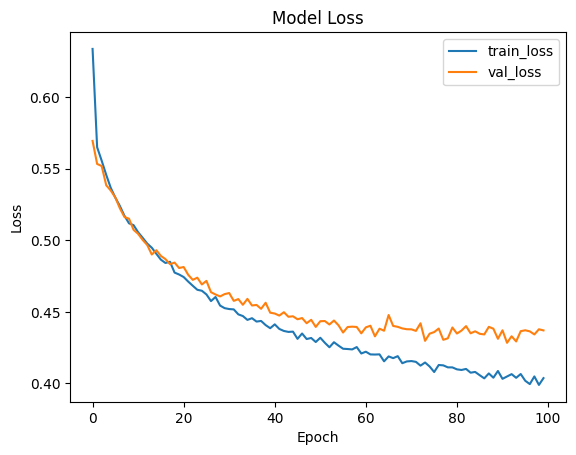

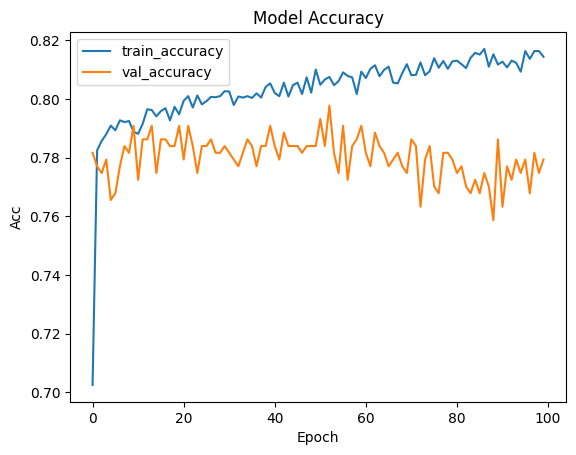

In [93]:
model_loss = pd.DataFrame({'train_loss': history.history['loss'], 
                           'val_loss': history.history['val_loss']
                          })

model_loss.plot(title='Model Loss').set(xlabel='Epoch',ylabel='Loss')

model_acc = pd.DataFrame({'train_accuracy': history.history['accuracy'], 
                           'val_accuracy': history.history['val_accuracy']
                          })
model_acc.plot(title='Model Accuracy').set(xlabel='Epoch',ylabel='Acc')

# Predict on test set

In [30]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [32]:
passengerids = test.PassengerId
test.drop(columns=['Name','PassengerId'], inplace=True)

In [33]:
test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['Age']=test['Age'].fillna(test['Age'].median())
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].median())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].median())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].median())
test['Spa'] = test['Spa'].fillna(test['Spa'].median())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].median())

test['CryoSleep'] = one_hot.fit_transform(test['CryoSleep'])
test['VIP'] = one_hot.fit_transform(test['VIP'])
test['HomePlanet'] = one_hot.fit_transform(test['HomePlanet'])
test['Destination'] = one_hot.fit_transform(test['Destination'])
test['Cabin'] = one_hot.fit_transform(test['Cabin'])

test_scaled = scaler.fit_transform(test)

In [152]:
predictions = model.predict(test_scaled)

134/134 [==============================] - 0s 2ms/step


In [153]:
predictions = np.where(predictions > 0.5, True, False)
output = pd.concat([passengerids, pd.DataFrame(predictions, columns=['Transported'])], axis=1)
output
output.to_csv('output_tf.csv',index=False)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
